In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [2]:
train_df= pd.read_csv("train.csv")
test_df= pd.read_csv("test.csv")

In [3]:
test_df.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [6]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [7]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [8]:
# extracting and then removing the targets from the training data 
targets = train_df['Survived']
train_df.drop(['Survived'], 1, inplace=True)

D:\Anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# merging train data and test data for future feature engineering
# we'll also remove the PassengerID since this is not an informative feature
combined = train_df.append(test_df)
combined.reset_index(inplace=True)
combined.drop(['index', 'PassengerId'], inplace=True, axis=1)

In [10]:
#Now let's map the title can bin them
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Dona": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [11]:
#Generate a new Title column
combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
combined['Title'] = combined['Title'].map(Title_Dictionary)


In [12]:
#let's get the median age based on people's gender, Pclass and Title
fill_mean = lambda g: g.fillna(g.mean())
combined['Age'] = combined.groupby(['Sex', 'Title', 'Pclass'])['Age'].apply(fill_mean)

In [13]:
# Name can be dropped now
combined.drop('Name', axis=1, inplace=True)

In [14]:
# removing the title variable
combined.drop('Title', axis=1, inplace=True)

In [15]:
# removing the Cabin variable
combined.drop('Cabin', axis=1, inplace=True)

In [16]:
# removing the Ticket variable
combined.drop('Ticket', axis=1, inplace=True)

In [17]:
#Fill out the missing fare data
combined['Fare'].fillna(combined['Fare'].mean(), inplace=True)

In [18]:
# two missing embarked values - filling them with the most frequent one in the train set
combined['Embarked'].fillna('S', inplace=True)

In [19]:
# encoding in dummy variable
embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
combined = pd.concat([combined, embarked_dummies], axis=1)
combined.drop('Embarked', axis=1, inplace=True)

In [20]:
# mapping gender to numerical one 
combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})


In [21]:
# introducing a new feature : the size of families (including the passenger)
combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1


In [22]:
combined

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,3,1,22.00000,1,0,7.2500,0,0,1,2
1,1,0,38.00000,1,0,71.2833,1,0,0,2
2,3,0,26.00000,0,0,7.9250,0,0,1,1
3,1,0,35.00000,1,0,53.1000,0,0,1,2
4,3,1,35.00000,0,0,8.0500,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1304,3,1,28.31891,0,0,8.0500,0,0,1,1
1305,1,0,39.00000,0,0,108.9000,1,0,0,1
1306,3,1,38.50000,0,0,7.2500,0,0,1,1
1307,3,1,28.31891,0,0,8.0500,0,0,1,1


In [23]:
#Prepare the training dataset
df_im_input=combined.iloc[:891]
df_im_output=targets

In [24]:
#build Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(df_im_input,targets)

D:\Anaconda3\envs\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [25]:
#Let’s first test our training dataset prediction accuracy
#get predictions based on training input
preds=logreg.predict(df_im_input)
preds_probabilities = logreg.predict_proba(df_im_input)


In [26]:
#preds_probabilities has two numbers for each row of features: [probability of false, probability of true]
preds_probabilities.shape

(891, 2)

In [27]:
#just need one as they can be calcualted using 1- other
pred_probs = preds_probabilities[:, 1]


In [28]:
from sklearn.metrics import roc_curve, auc
#roc_curve() returns a list of false positive rates (FPR) and true positives rates (TPR) for different configurations of the classifier used to plot the ROC.
[fpr, tpr, thr] = roc_curve(targets, pred_probs)


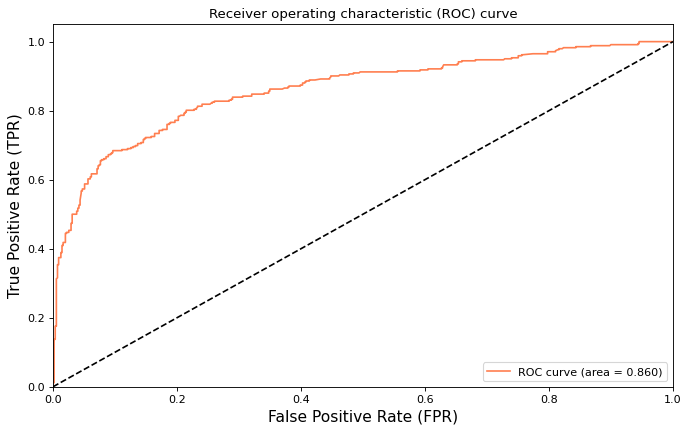

In [29]:
#plot ROC curve
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


In [30]:
#check model accuracy on training dataset
from sklearn.metrics import confusion_matrix, accuracy_score
print("accuracy: %2.3f" % accuracy_score(targets, preds))
print("AUC: %2.3f" % auc(fpr, tpr))

accuracy: 0.804
AUC: 0.860


In [31]:
#confusion matrix can give us the number of true positives, false positives, true negatives, and false negatives.
conf_m=confusion_matrix(targets, preds)

In [32]:
conf_m

array([[478,  71],
       [104, 238]], dtype=int64)

In [33]:
#get the test input and predictions
df_test_input=combined.iloc[891:]
df_test_preds=logreg.predict(df_test_input)

In [34]:
#output the results to a csv file
submit = pd.DataFrame()
test = pd.read_csv('test.csv')
submit['PassengerId'] = test['PassengerId']
submit['Survived'] = df_test_preds
submit.to_csv('Titanic_LR.csv', index=False)

In [35]:
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [36]:
import random
random.randrange(combined.shape[0])

17

In [37]:
X_train=combined.iloc[:891]
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,3,1,22.000000,1,0,7.2500,0,0,1,2
1,1,0,38.000000,1,0,71.2833,1,0,0,2
2,3,0,26.000000,0,0,7.9250,0,0,1,1
3,1,0,35.000000,1,0,53.1000,0,0,1,2
4,3,1,35.000000,0,0,8.0500,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0,0,1,1
887,1,0,19.000000,0,0,30.0000,0,0,1,1
888,3,0,17.360874,1,2,23.4500,0,0,1,4
889,1,1,26.000000,0,0,30.0000,1,0,0,1


In [38]:
X_train["Target"]=targets

D:\Anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
k=100
test=[]
train=[]
n= int(X_train.shape[0]/k)
index=list(range(X_train.shape[0]))

for kk in range(k):
    train_index=list(range(X_train.shape[0]))
    test_index=random.sample(index, n)
    for i in test_index:
        index.remove(i)
    for i in test_index:
        train_index.remove(i)

    test.append(X_train.iloc[test_index])
    train.append(X_train.iloc[train_index])

In [40]:
test[0]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Target
532,3,1,17.000000,1,1,7.2292,1,0,0,3,0
250,3,1,28.318910,0,0,7.2500,0,0,1,1,0
330,3,0,17.360874,2,0,23.2500,0,1,0,3,1
686,3,1,14.000000,4,1,39.6875,0,0,1,6,0
373,1,1,22.000000,0,0,135.6333,1,0,0,1,0
472,2,0,33.000000,1,2,27.7500,0,0,1,4,1
277,2,1,32.346715,0,0,0.0000,0,0,1,1,0
180,3,0,17.360874,8,2,69.5500,0,0,1,11,0


In [41]:
test[1]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Target
12,3,1,20.000000,0,0,8.050,0,0,1,1,0
161,2,0,40.000000,0,0,15.750,0,0,1,1,1
85,3,0,33.000000,3,0,15.850,0,0,1,4,1
481,2,1,32.346715,0,0,0.000,0,0,1,1,0
592,3,1,47.000000,0,0,7.250,0,0,1,1,0
129,3,1,45.000000,0,0,6.975,0,0,1,1,0
165,3,1,9.000000,0,2,20.525,0,0,1,3,1
586,2,1,47.000000,0,0,15.000,0,0,1,1,0


In [42]:
train[0].iloc[:,:-1]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,3,1,22.000000,1,0,7.2500,0,0,1,2
1,1,0,38.000000,1,0,71.2833,1,0,0,2
2,3,0,26.000000,0,0,7.9250,0,0,1,1
3,1,0,35.000000,1,0,53.1000,0,0,1,2
4,3,1,35.000000,0,0,8.0500,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0,0,1,1
887,1,0,19.000000,0,0,30.0000,0,0,1,1
888,3,0,17.360874,1,2,23.4500,0,0,1,4
889,1,1,26.000000,0,0,30.0000,1,0,0,1


In [43]:
train[0].iloc[:,-1]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Target, Length: 883, dtype: int64

In [44]:
#Prepare the training dataset
df_im_input=train[0].iloc[:,:-1]
df_im_output=train[0].iloc[:,-1]

In [45]:
logreg = LogisticRegression()
logreg.fit(df_im_input,df_im_output)

D:\Anaconda3\envs\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [46]:
#Let’s first test our training dataset prediction accuracy
#get predictions based on training input
preds=logreg.predict(df_im_input)
preds_probabilities = logreg.predict_proba(df_im_input)
pred_probs = preds_probabilities[:, 1]
[fpr, tpr, thr] = roc_curve(df_im_output, pred_probs)
auc(fpr, tpr)

0.8595845520528653

In [47]:
accuracy_score(df_im_output, preds)

0.8086070215175538

In [48]:
model = LogisticRegression()

In [49]:
def cross_validation(df,k=10):
    test=[]
    train=[]
    AUC=[]
    n= int(df.shape[0]/k)
    index=list(range(df.shape[0]))

    for kk in range(k):
        train_index=list(range(df.shape[0]))
        test_index=random.sample(index, n)
        for i in test_index:
            index.remove(i)
        for i in test_index:
            train_index.remove(i)
    
        test.append(df.iloc[test_index])
        train.append(df.iloc[train_index])
    for i in range(k):
        df_im_input=train[i].iloc[:,:-1]
        df_im_output=train[i].iloc[:,-1]

        model.fit(df_im_input,df_im_output)
        preds=model.predict(df_im_input)
        preds_probabilities = logreg.predict_proba(df_im_input)
        pred_probs = preds_probabilities[:, 1]
        [fpr, tpr, thr] = roc_curve(df_im_output, pred_probs)
        AUC.append(auc(fpr, tpr))
    return AUC

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
X_train=df_im_input
y_train=df_im_output

In [51]:
def cross_validation_split(dataset, folds):
        dataset_split = []
        fold_size = int(X_train.shape[0] / folds) #number of rows in each fold
        ini_index=[0] #start from index 0
        remains= fold_size % folds 
        
        
        # for loop to save each fold
        for i in range(1,remains):
            ini_index.append(i*fold_size+1)

        for j in range (remains, folds+1):
            ini_index.append(j*fold_size+remains)

            # save the fold     
        for n in range(len(ini_index)-1):
            dataset_split.append([ini_index[n], ini_index[n+1]])
            
        return dataset_split

In [52]:

def cross_validation(model, X_train, y_train, k):
    index=cross_validation_split(X_train,k)
    
    # train each sub-combination
    auc = []
    for i in range(k):
        
        cv_xtest = X_train.iloc[index[i][0]:index[i][1],:]
        cv_ytest = y_train.iloc[index[i][0]:index[i][1],]
        
        # drop the test sub-set
        cv_xtrain = X_train.drop(X_train.index[index[i][0]:index[i][1]])
        cv_ytrain = y_train.drop(X_train.index[index[i][0]:index[i][1]])
        
        model.fit(cv_xtrain, cv_ytrain.values.reshape(-1))
        
        # calculate the auc as the evaluation metric
        fpr, tpr, threshold = roc_curve(cv_ytest, model.predict_proba(cv_xtest)[:,1])
        auc_roc = metrics.auc(fpr, tpr)
        auc.append(auc_roc)
    
    return np.mean(auc)

In [53]:
param_grid = {'n_estimators': [50, 100, 200,500,10],
              'criterion': ['gini', 'entropy'],
              'max_depth': [2, 3, 5, 10,20],
              'max_features': [2,3,4,5],
             }

In [54]:
#create a dictionery for parameters
import itertools as it
parameters = it.product(*(param_grid[title] for title in list(param_grid)))
print(list(param_grid))

['n_estimators', 'criterion', 'max_depth', 'max_features']


In [55]:
RandomForest_df=pd.DataFrame()

In [56]:
auc_average=[]
optimal_param=[]
for i in list(parameters):
    rf = RandomForestClassifier(n_estimators = i[0], criterion=i[1], max_depth = i[2], max_features = i[3])

    auc = cross_validation(rf, X_train, y_train, 5)
    auc_average.append(auc)
    optimal_param.append(i)


In [57]:
RandomForest_df["auc_average"]=auc_average
RandomForest_df["optimal_param"]=optimal_param
RandomForest_df.sort_values(by="auc_average",ascending=False)

,auc_average,optimal_param
171,0.869146,"(10, gini, 5, 5)"
49,0.869103,"(100, gini, 5, 3)"
155,0.869032,"(500, entropy, 10, 5)"
11,0.868616,"(50, gini, 5, 5)"
29,0.868374,"(50, entropy, 5, 3)"
...,...,...
164,0.831598,"(10, gini, 3, 2)"
196,0.828632,"(10, entropy, 20, 2)"
181,0.825327,"(10, entropy, 2, 3)"
180,0.823442,"(10, entropy, 2, 2)"


In [58]:
clf = RandomForestClassifier(n_estimators=50,criterion='entropy', max_depth=5, max_features='log2')
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       n_estimators=50)

In [59]:
cross_validation(clf, X_train, y_train, 10)

0.8659737641933438

In [60]:
y_pred=clf.predict(X_train)
ypreds_proba = clf.predict_proba(X_train)

No handles with labels found to put in legend.


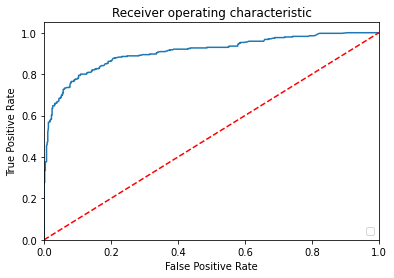

In [61]:
[fpr, tpr, thr]= roc_curve(y_train,ypreds_proba[:, 1])
plt.figure()
# plt.plot(fpr, tpr, label='AUC value (area = %0.2f)' % auc(fpr, tpr))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [62]:

from sklearn.metrics import confusion_matrix, accuracy_score
print("Model accuracy is %2.3f" % accuracy_score(y_train, y_pred))

Model accuracy is 0.847


Text(0.5, 1.05, 'confusion matrix')

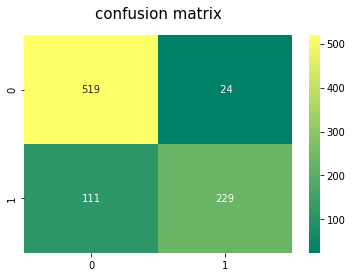

In [63]:
cm = confusion_matrix(y_train,y_pred)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('confusion matrix', y=1.05, size=15)

In [64]:
X_test=combined.iloc[891:]

In [65]:
test_pred=clf.predict(X_test)
test_predprob=clf.predict_proba(X_test)

In [66]:
threshold=0.5

In [67]:
pred=[]
for i in range(len(test_predprob[:,1])):
    if test_predprob[:,1][i]>threshold:
        p=1
    else:
        p=0
    pred.append(p)
pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,


In [68]:
y_result=pred

In [69]:
X_test["Survived"]=y_result
X_test.head(20)

D:\Anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Survived
891,3,1,34.50000,0,0,7.8292,0,1,0,1,0
892,3,0,47.00000,1,0,7.0000,0,0,1,2,0
893,2,1,62.00000,0,0,9.6875,0,1,0,1,0
894,3,1,27.00000,0,0,8.6625,0,0,1,1,0
895,3,0,22.00000,1,1,12.2875,0,0,1,3,0
896,3,1,14.00000,0,0,9.2250,0,0,1,1,0
897,3,0,30.00000,0,0,7.6292,0,1,0,1,0
898,2,1,26.00000,1,1,29.0000,0,0,1,3,0
899,3,0,18.00000,0,0,7.2292,1,0,0,1,1
900,3,1,21.00000,2,0,24.1500,0,0,1,3,0


In [70]:
clf.feature_importances_

array([0.15341432, 0.38673159, 0.14128557, 0.03522599, 0.0280944 ,
       0.15950232, 0.01097811, 0.0107035 , 0.0160676 , 0.05799659])

<BarContainer object of 10 artists>

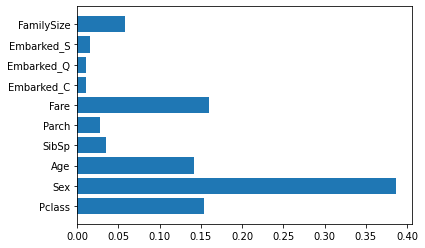

In [71]:
plt.barh(X_train.columns, clf.feature_importances_)